# Manhattan plots
Compute Pearson correlation between 2 groups of samples for each feature

Author: Andrei Todor

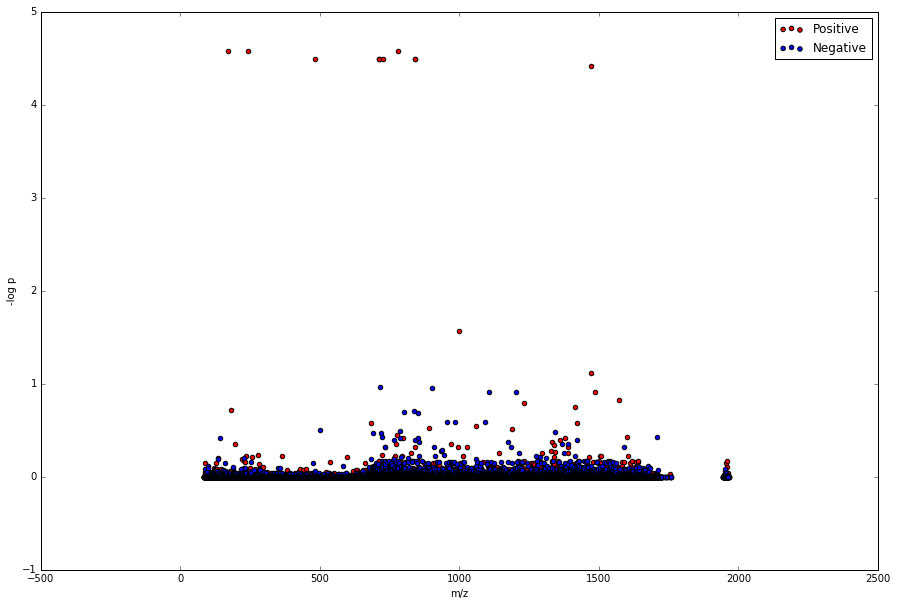

In [1]:
import pandas as pd
import numpy as np
from pylab import *
from scipy.stats.stats import pearsonr
from statsmodels.sandbox.stats.multicomp import multipletests

infile = "../results/features_avg_pos.txt"
mydata = pd.read_table(infile)
header = [x for x in mydata]

g = []
for type in ['mock','yf']:
    g.append([sample for sample in header if type in sample])

corr = []
for idx in range(mydata.shape[0]):
    corr.append(pearsonr(mydata.iloc[idx][g[0]], mydata.iloc[idx][g[1]]))
bh = multipletests([x[1] for x in corr], method = 'fdr_bh')

#Type I Manhattan plot
figure(figsize = (15,10))
x = [mydata.iloc[i].mz for i in range(len(corr)) if corr[i][0] >= 0]
y = [bh[1][i] for i in range(len(corr)) if corr[i][0] >= 0]
matplotlib.pyplot.scatter(x, -np.log10(y), c = 'red', label = "Positive")

x = [mydata.iloc[i].mz for i in range(len(corr)) if corr[i][0] < 0]
y = [bh[1][i] for i in range(len(corr)) if corr[i][0] < 0]
matplotlib.pyplot.scatter(x, -np.log10(y), c = 'blue', label = "Negative")

xlabel("m/z")
ylabel("-log p")
legend()
show()

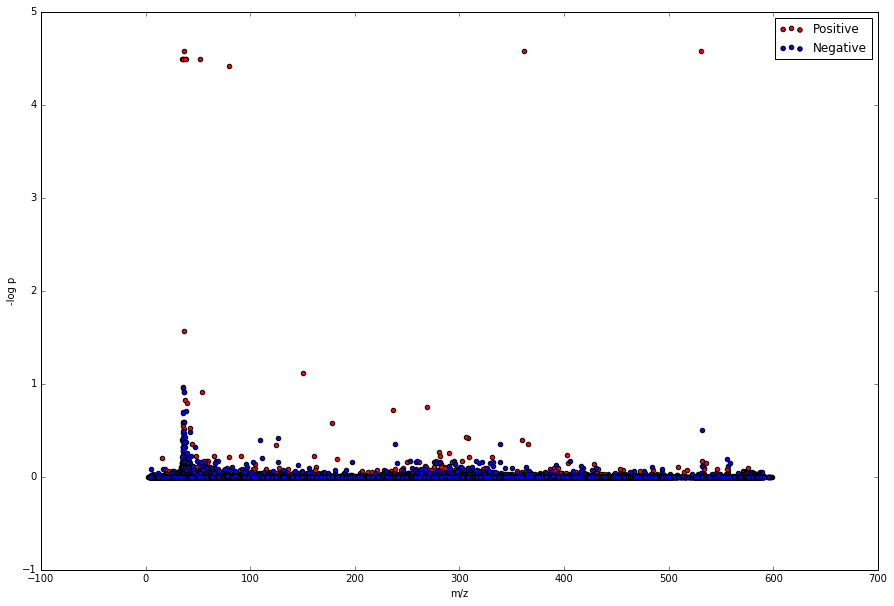

In [2]:
#Type II Manhattan plot
figure(figsize = (15,10))
x = [mydata.iloc[i].time for i in range(len(corr)) if corr[i][0] >= 0]
y = [bh[1][i] for i in range(len(corr)) if corr[i][0] >= 0]
matplotlib.pyplot.scatter(x, -np.log10(y), c = 'red', label = "Positive")

x = [mydata.iloc[i].time for i in range(len(corr)) if corr[i][0] < 0]
y = [bh[1][i] for i in range(len(corr)) if corr[i][0] < 0]
matplotlib.pyplot.scatter(x, -np.log10(y), c = 'blue', label = "Negative")


xlabel("m/z")
ylabel("-log p")
legend()
show()